In [1]:
import numpy as np
import OpenVisus as ov
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [4]:
model = "ACCESS-CM2"
variable = "tas"
year = 2020
scenario = "ssp585"
field = f"{variable}_day_{model}_{scenario}_r1i1p1f1_gn"

start_year = 2020
end_year = 2020
start_day = 0
end_day = 364
day_delta = 10

In [5]:
db = ov.LoadDataset(f"http://atlantis.sci.utah.edu/mod_visus?dataset=nex-gddp-cmip6&cached=arco")
print("Dataset loaded successfully!")
print(f"Available fields: {db.getFields()}")

Dataset loaded successfully!
Available fields: ['hurs_day_ACCESS-ESM1-5_historical_r1i1p1f1_gn', 'huss_day_ACCESS-ESM1-5_historical_r1i1p1f1_gn', 'pr_day_ACCESS-ESM1-5_historical_r1i1p1f1_gn', 'rlds_day_ACCESS-ESM1-5_historical_r1i1p1f1_gn', 'rsds_day_ACCESS-ESM1-5_historical_r1i1p1f1_gn', 'sfcWind_day_ACCESS-ESM1-5_historical_r1i1p1f1_gn', 'tas_day_ACCESS-ESM1-5_historical_r1i1p1f1_gn', 'tasmax_day_ACCESS-ESM1-5_historical_r1i1p1f1_gn', 'tasmin_day_ACCESS-ESM1-5_historical_r1i1p1f1_gn', 'hurs_day_ACCESS-ESM1-5_ssp126_r1i1p1f1_gn', 'huss_day_ACCESS-ESM1-5_ssp126_r1i1p1f1_gn', 'pr_day_ACCESS-ESM1-5_ssp126_r1i1p1f1_gn', 'rlds_day_ACCESS-ESM1-5_ssp126_r1i1p1f1_gn', 'rsds_day_ACCESS-ESM1-5_ssp126_r1i1p1f1_gn', 'sfcWind_day_ACCESS-ESM1-5_ssp126_r1i1p1f1_gn', 'tas_day_ACCESS-ESM1-5_ssp126_r1i1p1f1_gn', 'tasmax_day_ACCESS-ESM1-5_ssp126_r1i1p1f1_gn', 'tasmin_day_ACCESS-ESM1-5_ssp126_r1i1p1f1_gn', 'hurs_day_ACCESS-ESM1-5_ssp245_r1i1p1f1_gn', 'huss_day_ACCESS-ESM1-5_ssp245_r1i1p1f1_gn', 'pr_day_

Frame 0: timestep=737300, year=2020, day=0
Shape: (600, 1440), Min: nan, Max: nan


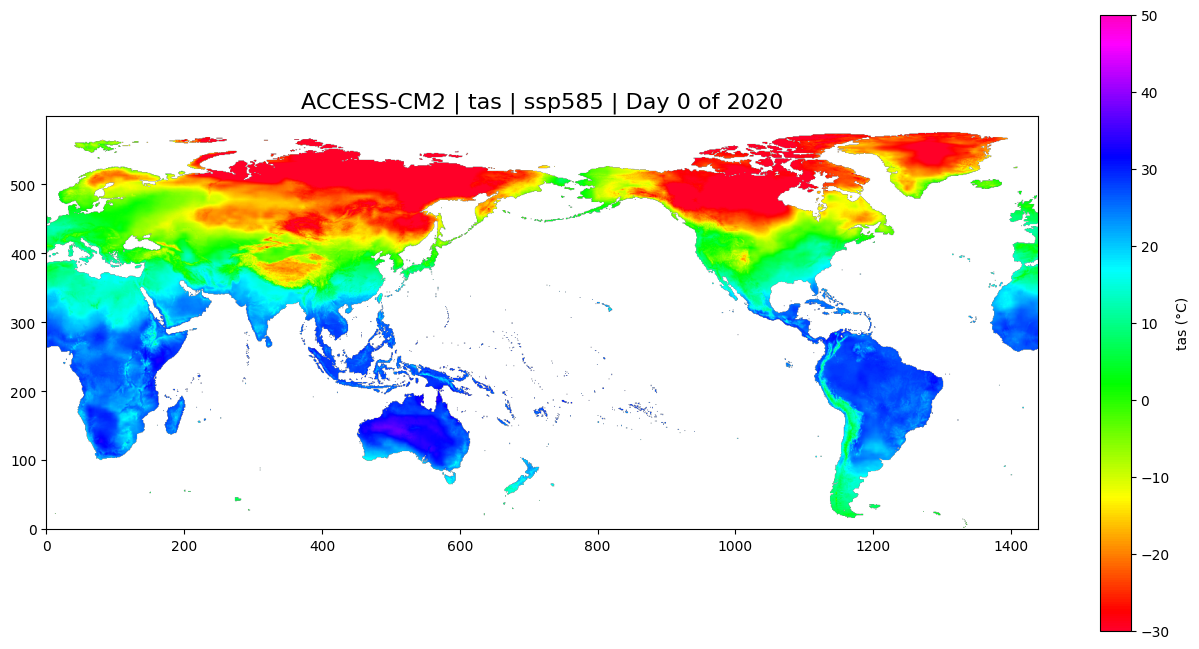

In [6]:
time_steps = []
for year in range(start_year, end_year + 1):
    for day in range(start_day, end_day + 1, day_delta):
        timestep = year * 365 + day
        time_steps.append((timestep, year, day))

first_timestep = time_steps[0][0]
initial_data = db.read(field=field, time=first_timestep)
if variable == "tas":
    initial_data = initial_data - 273.15

fig, ax = plt.subplots(figsize=(16, 8))
cmap = 'gist_rainbow'
img = ax.imshow(initial_data, cmap=cmap, origin='lower', vmin=-30, vmax=50)
title = ax.set_title('', fontsize=16)
cbar = plt.colorbar(img, ax=ax, label=f'{variable} (°C)')

def update(frame_index):
    timestep, year, day = time_steps[frame_index]
    data = db.read(field=field, time=timestep)

    if variable == "tas":
        data = data - 273.15

    if data is None or np.isnan(data).all():
        data = np.zeros_like(initial_data)

    img.set_data(data)
    title.set_text(f"{model} | {variable} | {scenario} | Day {day} of {year}")

    print(f"Frame {frame_index}: timestep={timestep}, year={year}, day={day}")
    print(f"Shape: {data.shape}, Min: {np.min(data)}, Max: {np.max(data)}")
    return [img, title]

anim = animation.FuncAnimation(
    fig, update, frames=len(time_steps), interval=300, blit=False
)


In [7]:
anim.save('test.gif', writer='pillow', fps=10)

plt.tight_layout()
plt.show()

Frame 0: timestep=737300, year=2020, day=0
Shape: (600, 1440), Min: nan, Max: nan
Frame 0: timestep=737300, year=2020, day=0
Shape: (600, 1440), Min: nan, Max: nan
Frame 1: timestep=737310, year=2020, day=10
Shape: (600, 1440), Min: nan, Max: nan
Frame 2: timestep=737320, year=2020, day=20
Shape: (600, 1440), Min: nan, Max: nan
Frame 3: timestep=737330, year=2020, day=30
Shape: (600, 1440), Min: nan, Max: nan
Frame 4: timestep=737340, year=2020, day=40
Shape: (600, 1440), Min: nan, Max: nan
Frame 5: timestep=737350, year=2020, day=50
Shape: (600, 1440), Min: nan, Max: nan
Frame 6: timestep=737360, year=2020, day=60
Shape: (600, 1440), Min: nan, Max: nan
Frame 7: timestep=737370, year=2020, day=70
Shape: (600, 1440), Min: nan, Max: nan
Frame 8: timestep=737380, year=2020, day=80
Shape: (600, 1440), Min: nan, Max: nan
Frame 9: timestep=737390, year=2020, day=90
Shape: (600, 1440), Min: nan, Max: nan
Frame 10: timestep=737400, year=2020, day=100
Shape: (600, 1440), Min: nan, Max: nan
Fram

<Figure size 640x480 with 0 Axes>